异常检测实战task:
1、基于 anomaly_data.csv数据，可视化数据分布情况、及其对应高斯分布的概率密度函数
2、建立模型，实现异常数据点预测
3、可视化异常检测处理结果
4、修改概率分布阙值ELlipticEnvelope(contamination=0,1)中的contamination，查看阙值改变对结果的影响

In [1]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('anomaly_data.csv')
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


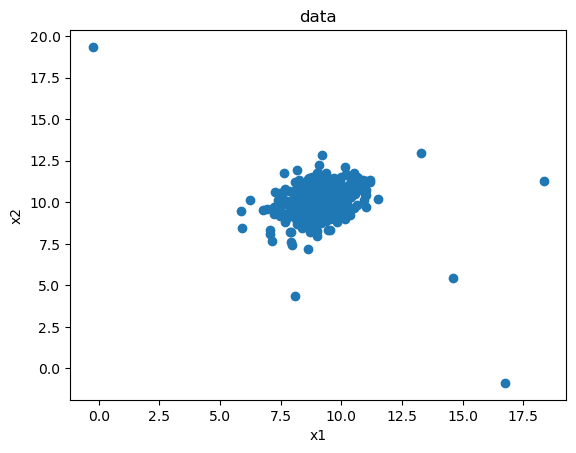

In [2]:
#visualize the data
from matplotlib import pyplot as plt
plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'])
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
# define x1 and x2
x1 =  data.loc[:,'x1']
x2 =  data.loc[:,'x2']

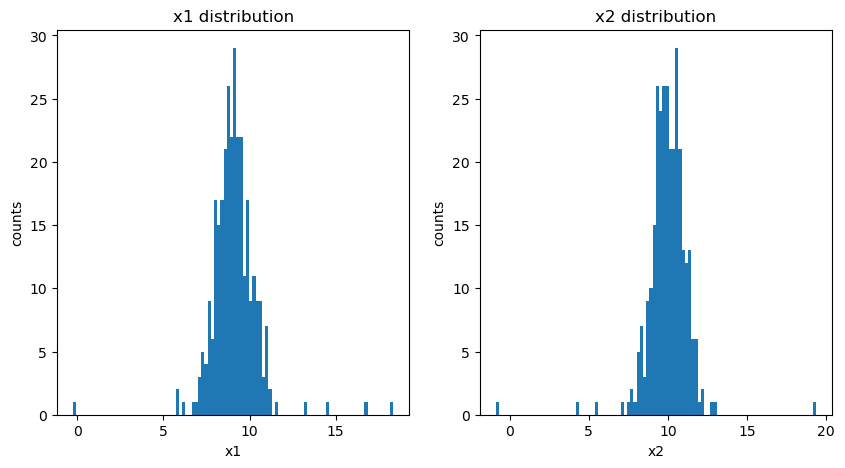

In [6]:
# 创建一个新的图表对象，设置尺寸为宽度 10 英寸，高度 5 英寸
fig2 = plt.figure(figsize=(10, 5))
# 定义第一个子图，将图表分成 1 行 2 列的子图网格，并选择第 1 个子图（左侧）
plt.subplot(121)
# 在第一个子图中创建 x1 数据的直方图，使用 100 个柱子
plt.hist(x1, bins=100)
# 设置第一个子图的标题
plt.title('x1 distribution')
# 设置 x 轴标签
plt.xlabel('x1')
# 设置 y 轴标签，表示柱子的高度（数据点的数量）
plt.ylabel('counts')
# 定义第二个子图，将图表分成 1 行 2 列的子图网格，并选择第 2 个子图（右侧）
plt.subplot(122)
# 在第二个子图中创建 x2 数据的直方图，使用 100 个柱子
plt.hist(x2, bins=100)
# 设置第二个子图的标题
plt.title('x2 distribution')
# 设置 x 轴标签
plt.xlabel('x2')
# 设置 y 轴标签，表示柱子的高度（数据点的数量）
plt.ylabel('counts')
# 显示整个图表，包含两个子图
plt.show()

In [7]:
# calculate the mean and sigma of x1 and x2
# 计算 x1 数据的均值和标准差
x1_mean = x1.mean()   # 均值
x1_sigma = x1.std()   # 标准差
# 计算 x2 数据的均值和标准差
x2_mean = x2.mean()   # 均值
x2_sigma = x2.std()   # 标准差
print(x1_mean,x1_sigma,x2_mean,x2_sigma)

9.112225783931596 1.3559573758220915 9.997710507954398 1.3097071175386399


In [12]:
# calculate the gaussian distribution p(x)
from scipy.stats import norm
# 创建一个范围从 0 到 20 的等间隔数组，共 300 个数据点，用于 x1 数据集的正态分布曲线
x1_range = np.linspace(0, 20, 300)
# 使用 norm.pdf 函数创建 x1 数据集的正态分布曲线，以 x1_mean 和 x1_sigma 为参数
x1_normal = norm.pdf(x1_range, x1_mean, x1_sigma)
# 创建一个范围从 0 到 20 的等间隔数组，共 300 个数据点，用于 x2 数据集的正态分布曲线
x2_range = np.linspace(0, 20, 300)
# 使用 norm.pdf 函数创建 x2 数据集的正态分布曲线，以 x2_mean 和 x2_sigma 为参数
x2_normal = norm.pdf(x2_range, x2_mean, x2_sigma)

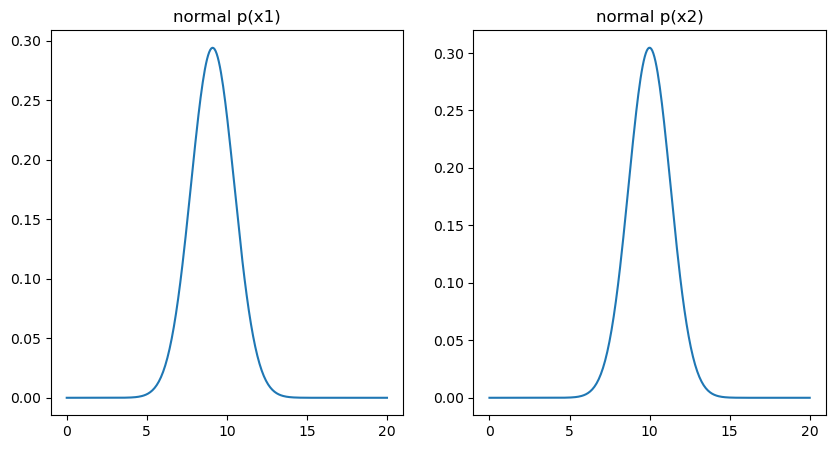

In [13]:
# visualize the p(x)
fig2 = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(x1_range,x1_normal)
plt.title('normal p(x1)')
plt.subplot(122)
plt.plot(x2_range,x2_normal)
plt.title('normal p(x2)')
plt.show()

In [14]:
#establish the model and predict
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope()
ad_model.fit(data)

EllipticEnvelope()

In [16]:
# make pridiction
y_predict = ad_model.predict(data)
print(pd.value_counts(y_predict))

 1    276
-1     31
Name: count, dtype: int64


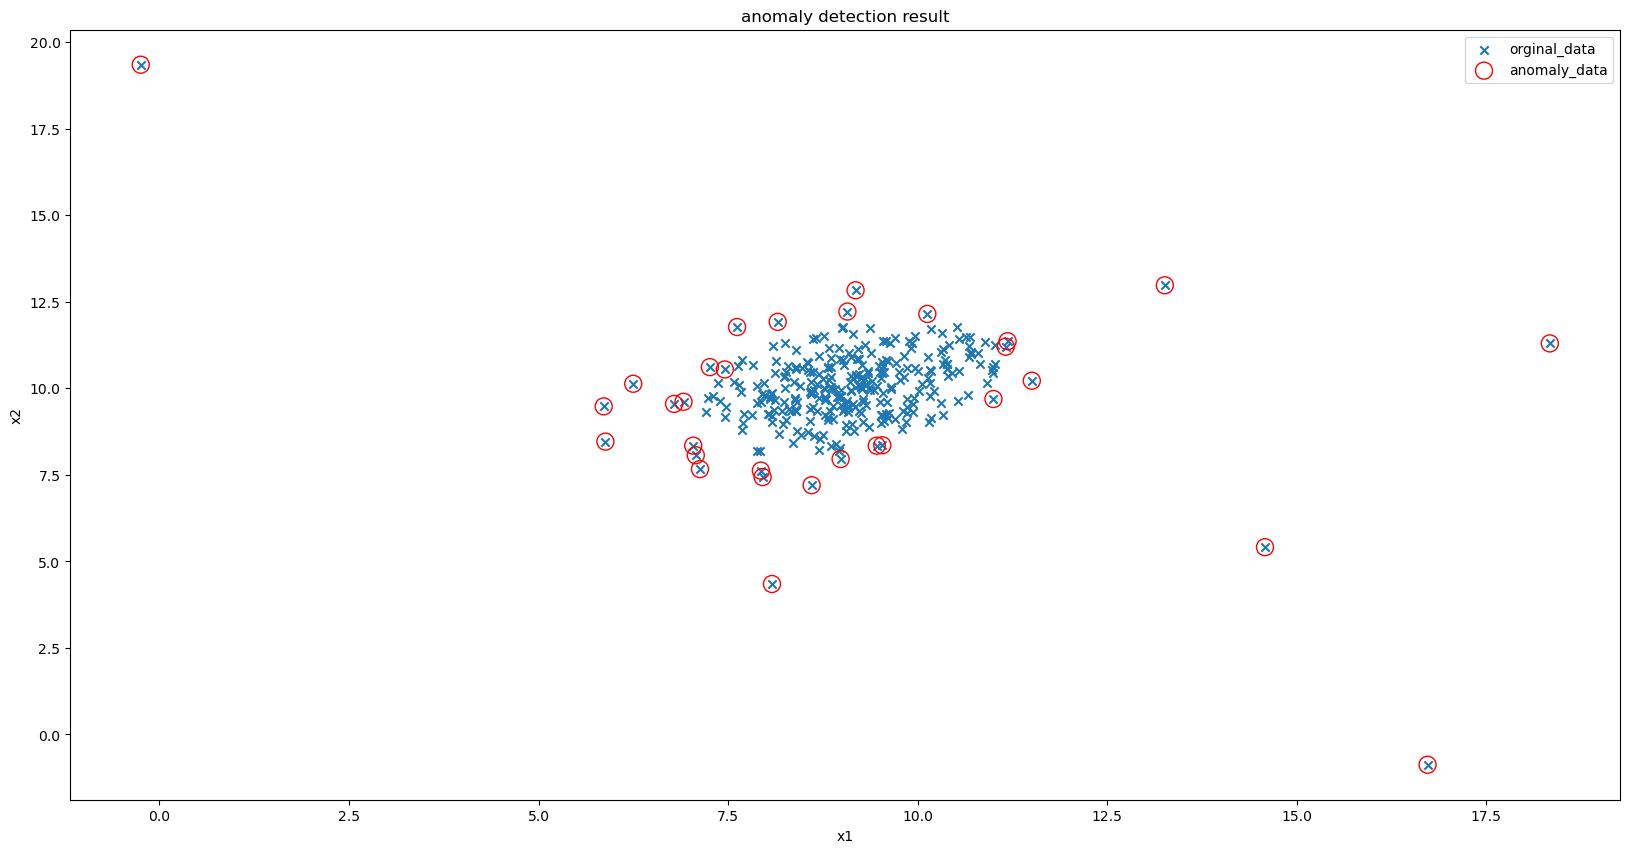

In [21]:
fig4 = plt.figure(figsize=(20,10))
orginal_data = plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x')
anomaly_data = plt.scatter(data.loc[:,'x1'][y_predict==-1],data.loc[:,'x2'][y_predict==-1],marker='o',facecolor='none',edgecolors='red',s=150)
plt.title('anomaly detection result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((orginal_data,anomaly_data),('orginal_data','anomaly_data'))
plt.show()

 1    300
-1      7
Name: count, dtype: int64


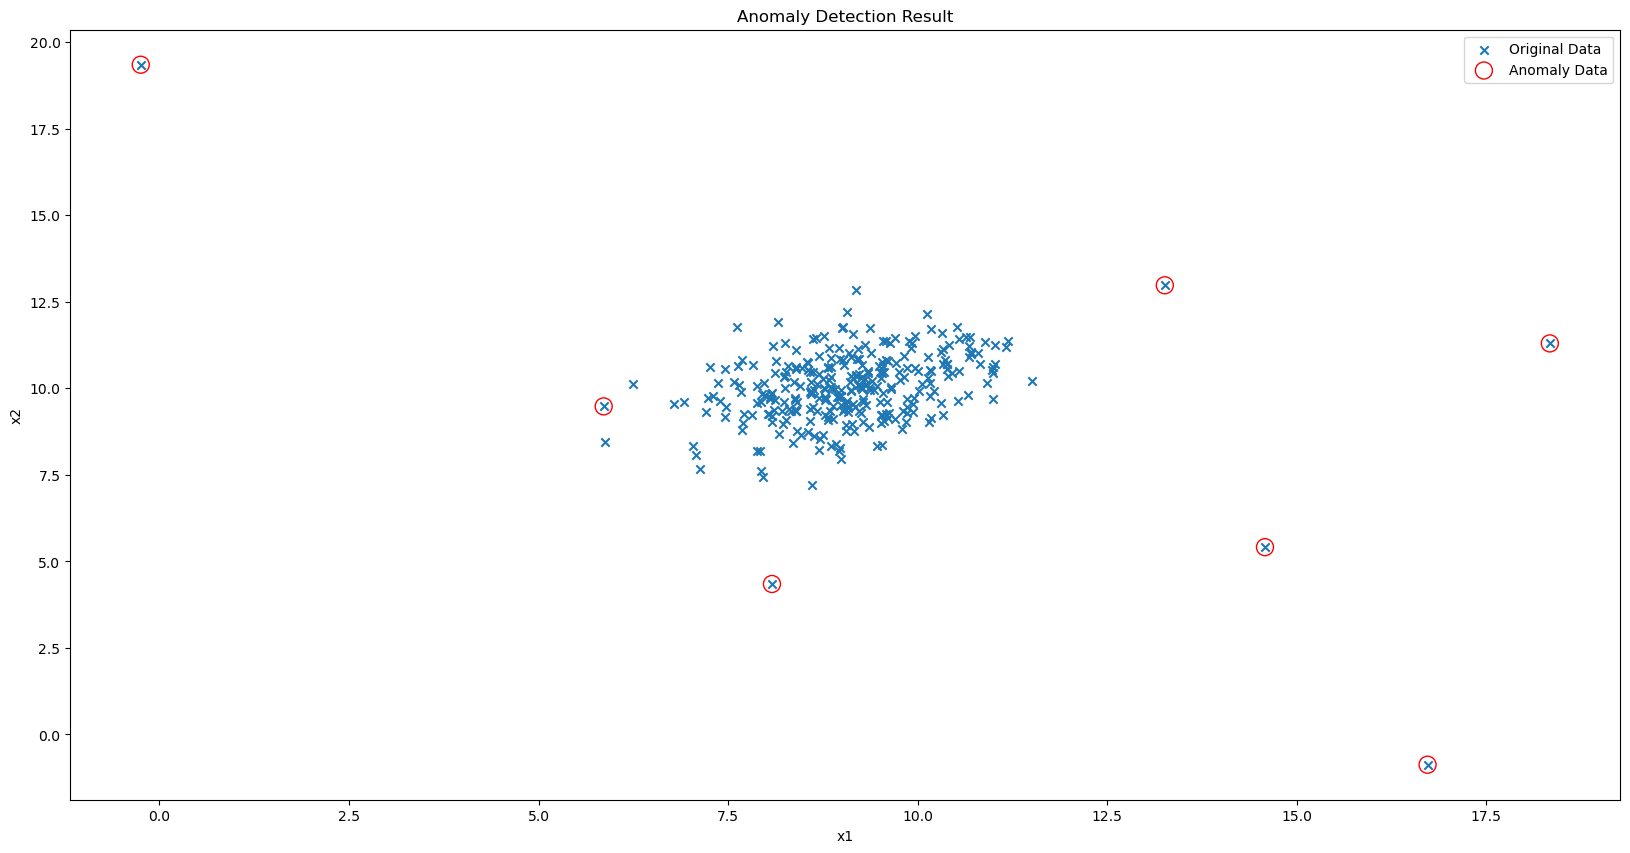

In [33]:
# 创建 Elliptic Envelope 异常检测模型 自定义阈值0.02
ad_model = EllipticEnvelope(contamination=0.02)
# 使用模型拟合数据
ad_model.fit(data)
# 使用模型预测数据中的异常点
y_predict = ad_model.predict(data)
# 统计异常点数量并打印
print(pd.value_counts(y_predict))
# 创建图形窗口
fig5 = plt.figure(figsize=(20, 10))
# 绘制原始数据中的正常点（用 "x" 标记）
orginal_data = plt.scatter(data.loc[:, 'x1'], data.loc[:, 'x2'], marker='x')
# 绘制被检测为异常的点（用 "o" 标记，红色边框，无填充颜色，设置点大小）
anomaly_data = plt.scatter(data.loc[:, 'x1'][y_predict == -1], data.loc[:, 'x2'][y_predict == -1], marker='o', facecolor='none', edgecolors='red', s=150)
# 设置图形标题和坐标轴标签
plt.title('Anomaly Detection Result')
plt.xlabel('x1')
plt.ylabel('x2')
# 创建图例，解释不同标记的含义
plt.legend((orginal_data, anomaly_data), ('Original Data', 'Anomaly Data'))
# 显示绘制的图形
plt.show()

异常检测实战summary:
1、通过计算数据各维度对应的高斯分布概率密度函数，可用于寻找到数据中的异常点:
2、通过修改概率密度阙值contamination，可调整异常点检测的灵敏度;
3、核心算法参考链接:
https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html?highlight=ellipticenvelope